1.1 Tomando todo el conjunto de entrenamiento

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 0]
 ...
 [0 1 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


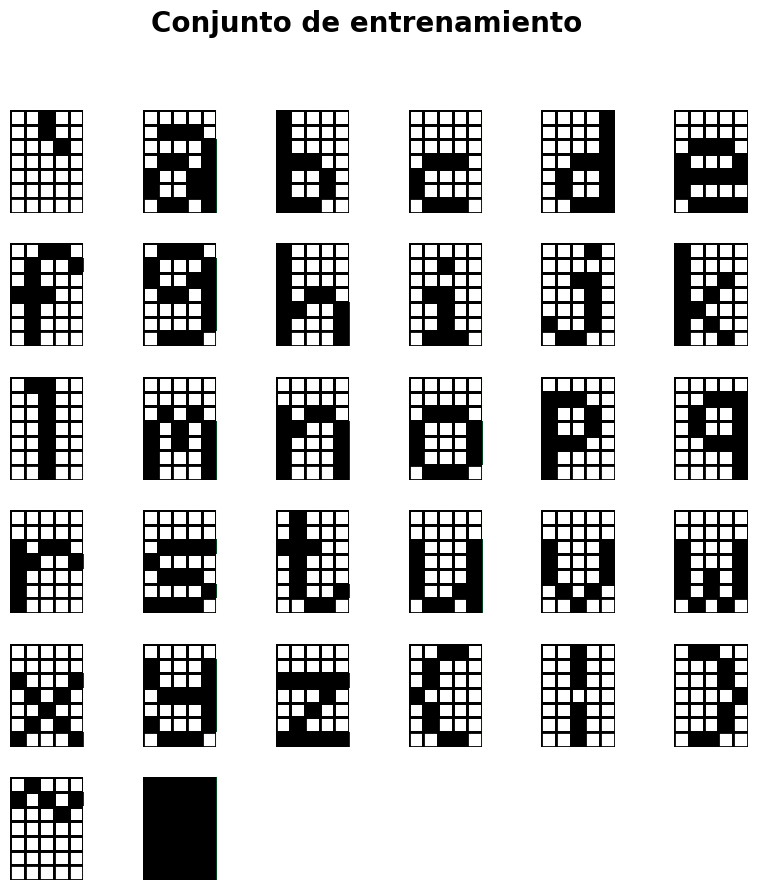

0
1000
2000
3000
4000
Finished Training. 
 MSE: 0.6901362861777318


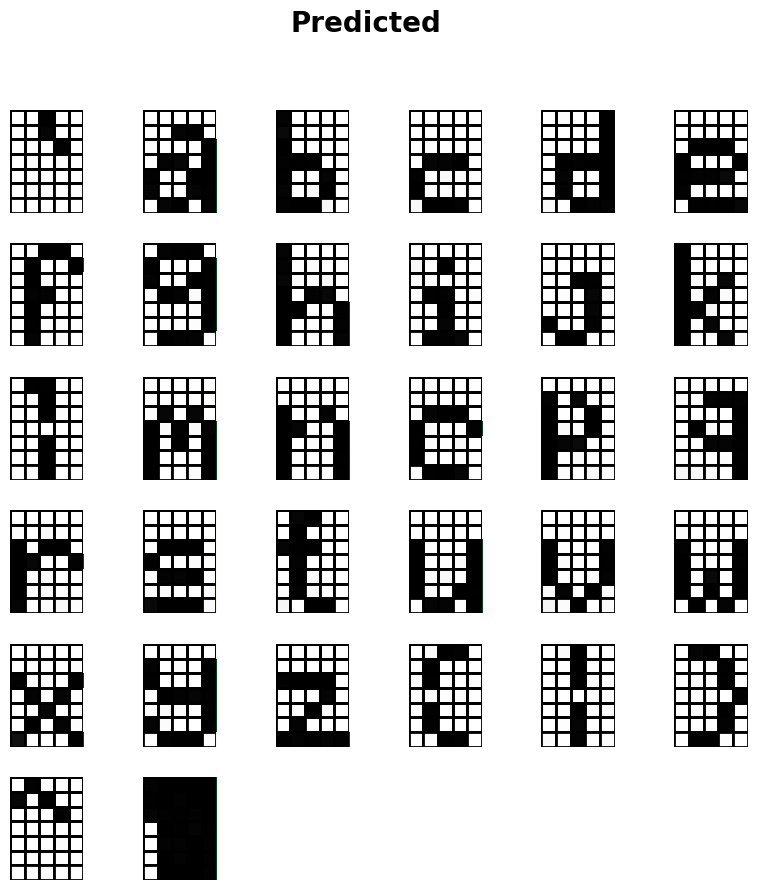

Latent space value:  [0.24423687 0.37772529]  for letter in index  0
Latent space value:  [0.96603625 0.03647239]  for letter in index  1
Latent space value:  [0.65500615 0.34812192]  for letter in index  2
Latent space value:  [0.53083415 0.51092888]  for letter in index  3
Latent space value:  [0.49515493 0.01319375]  for letter in index  4
Latent space value:  [0.23376366 0.98026133]  for letter in index  5
Latent space value:  [0.0319643  0.17036147]  for letter in index  6
Latent space value:  [0.22331105 0.04484943]  for letter in index  7
Latent space value:  [0.98867793 0.93843348]  for letter in index  8
Latent space value:  [0.48461333 0.39782858]  for letter in index  9
Latent space value:  [0.32211872 0.62951411]  for letter in index  10
Latent space value:  [0.81434272 0.97801245]  for letter in index  11
Latent space value:  [0.10714135 0.64215157]  for letter in index  12
Latent space value:  [0.98877635 0.70090563]  for letter in index  13
Latent space value:  [0.990154

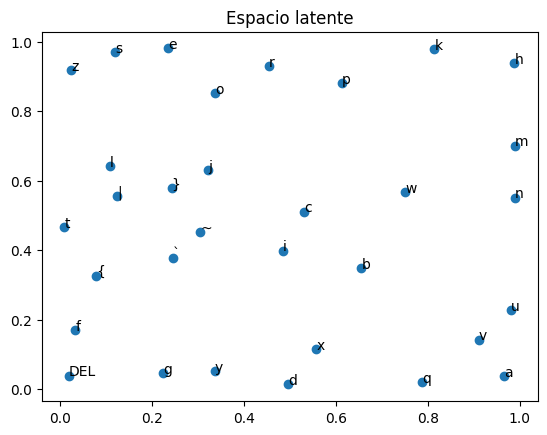

In [20]:
import json
from src.utils import DataConfig, extract_patterns
from src.autoencoder import Autoencoder
from src.plots import *
from data.font import _font_3, symbols3, _font_num, symbols_num


with open('./config_linear.json', 'r') as f:
        data_config = json.load(f)

c = DataConfig(data_config, _font_3)

print(c.input_data)

plot_letters(c.input_data, "Conjunto de entrenamiento")

autoencoder = Autoencoder(c.input_data, c.input_data, c.latent_space_size,
                              c.learning_rate, c.bias, c.epochs, c.training_percentage,
                              c.min_error, c.qty_hidden_layers, c.qty_nodes_in_hidden_layers, 
                              c.output_activation, c.hidden_activation, c.beta,
                              c.optimizer_method, c.alpha, c.beta1, c.beta2,
                              c.epsilon)
autoencoder.train()

predicted = []
for x in c.input_data:
        p = autoencoder.predict(x)
        predicted.append(p)
plot_letters(predicted, "Predicted")
    
list = []
for i in range(len(c.input_data)):
        value = autoencoder.latent_space(c.input_data[i])
        list.append(value)
        print("Latent space value: ", value, " for letter in index ", i)
plot_latent_space(np.array(list), symbols3)


1.2 Tomando un porcentaje del conjunto de entrenamiento.

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 0.16666671496061466


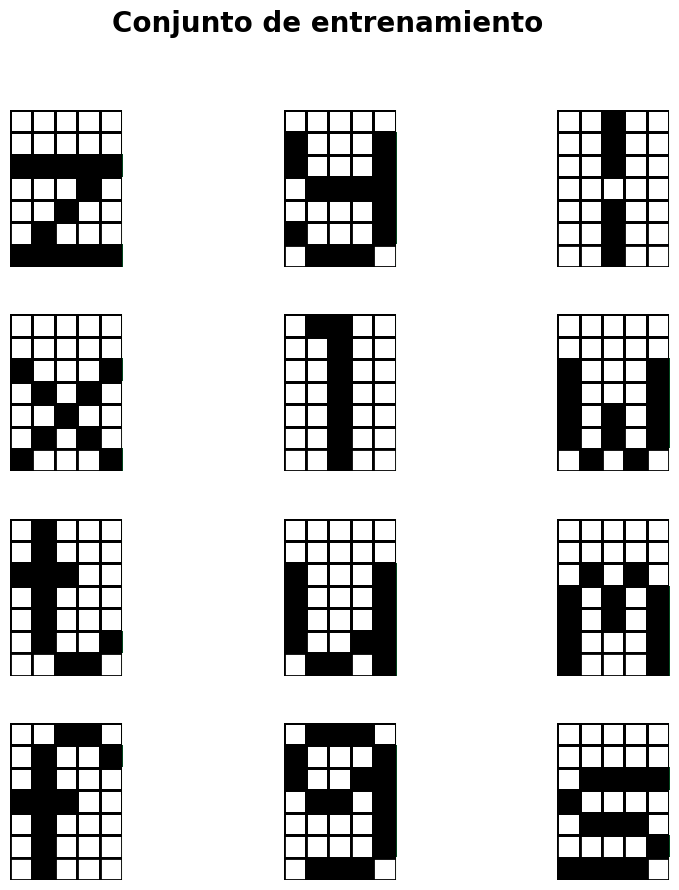

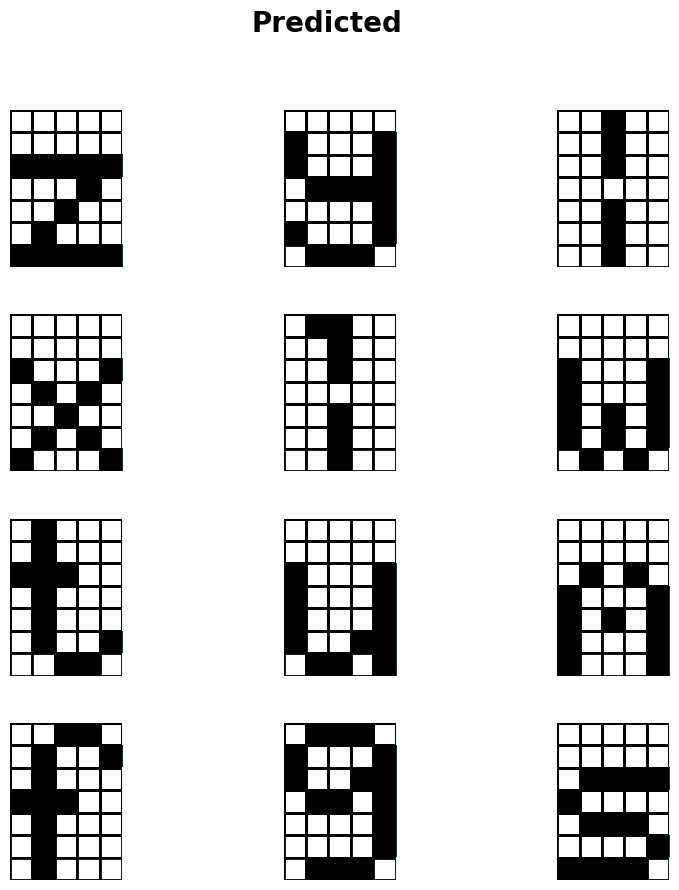

In [24]:
import json
from src.utils import DataConfig
from src.autoencoder import Autoencoder
from src.plots import *
from data.font import _font_3   

with open('./config_linear.json', 'r') as f:
    data_config = json.load(f)

c = DataConfig(data_config, _font_3)

autoencoder = Autoencoder(c.input_data, c.input_data, c.latent_space_size,
                        c.learning_rate, c.bias, 15000, 0.4,
                        c.min_error, 1, [10],
                        c.output_activation, c.hidden_activation, c.beta,
                        c.optimizer_method, c.alpha, c.beta1, c.beta2,
                        c.epsilon)
mse_errors, total_epochs = autoencoder.train()

plot_letters(autoencoder.train_input_data, "Conjunto de entrenamiento")

# Análisis de dataset original
predicted = []
for x in autoencoder.train_input_data:
    p = autoencoder.predict(x)
    predicted.append(p)
plot_letters(predicted, "Predicted")